# Create speech-enabled apps with Azure AI services

The Azure AI Speech service enables you to build speech-enabled applications. This module focuses on using the speech-to-text and text to speech APIs, which enable you to create apps that are capable of speech recognition and speech synthesis.

- Provision an Azure resource for the Azure AI Speech service
- Use the Azure AI Speech to text API to implement speech recognition
- Use the Text to speech API to implement speech synthesis
- Configure audio format and voices
- Use Speech Synthesis Markup Language (SSML)

Azure AI Speech provides APIs that you can use to build speech-enabled applications. This includes:

- Speech to text: An API that enables speech recognition in which your application can accept spoken input.
- Text to speech: An API that enables speech synthesis in which your application can provide spoken output.
- Speech Translation: An API that you can use to translate spoken input into multiple languages.
- Speaker Recognition: An API that enables your application to recognize individual speakers based on their voice.
- Intent Recognition: An API that uses conversational language understanding to determine the semantic meaning of spoken input.

**Using the Speech to text API:**

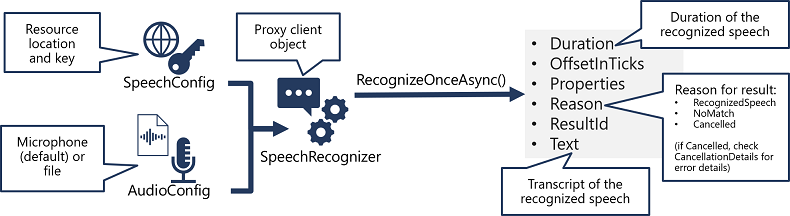

**Implementing speech synthesis:**

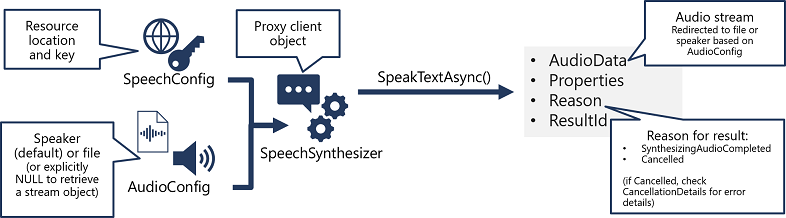

[Azure AI Speech SDK documentation - Language and voice support for the Speech service](https://learn.microsoft.com/en-us/azure/ai-services/speech-service/language-support?tabs=tts)

# Importing libraries

In [1]:
from dotenv import load_dotenv
from datetime import datetime
import os

In [2]:
import azure.cognitiveservices.speech as speech_sdk

In [3]:
from playsound import playsound

# Loading configurations

In [4]:
load_dotenv()
ai_key = os.getenv('SPEECH_KEY')
ai_region = os.getenv('SPEECH_REGION')

True

# Configure speech service

In [5]:
speech_config = speech_sdk.SpeechConfig(ai_key, ai_region)
print('Ready to use speech service in:', speech_config.region)

Ready to use speech service in: eastus


# Audio input functions

In [6]:
def take_audio_from_mic():
  audio_config = speech_sdk.AudioConfig(use_default_microphone=True)
  speech_recognizer = speech_sdk.SpeechRecognizer(speech_config, audio_config)
  print('🗣️ Speak now...')
  return speech_recognizer


def take_audio_from_file(audio_file_path):
  try:
    print('🔊⌛ Trying to play the audio using playSound')
    playsound(audio_file_path)
    print('🔊✔️ Audio successfully streamed to speaker device')
  except Exception as e:
    print(f'🔊⚠️ Error while trying to play the audio using playSound {str(e)}')

  audio_config = speech_sdk.AudioConfig(filename=audio_file_path)
  return speech_sdk.SpeechRecognizer(speech_config, audio_config)

# Transcribe command

In [7]:
current_dir = os.getcwd()
audio_file_path = os.path.join(current_dir, 'time.wav')
audio_file_path

'c:\\k26rahul\\Code\\Microsoft-AI-Odyssey\\1-Challenge-NLP\\7-Speech\\time.wav'

In [8]:
def transcribe_command(audio_file_path=None):
  print(f'🚨 [Transcribe command] {audio_file_path=}')
  command = ''

  if audio_file_path:
    print("🗃️ Transcribing audio from file:", audio_file_path)
    speech_recognizer = take_audio_from_file(audio_file_path)
  else:
    print("🎙️ Listening for audio input from microphone...")
    speech_recognizer = take_audio_from_mic()

  print('⌛ Please wait while transcribing the audio...')
  speech = speech_recognizer.recognize_once_async().get()

  if speech.reason == speech_sdk.ResultReason.RecognizedSpeech:
    command = speech.text
    print("✅ Transcription successful:", command)
  else:
    print("Recognition failed. Reason:", speech.reason)
    if speech.reason == speech_sdk.ResultReason.Canceled:
      cancellation = speech.cancellation_details
      print("Cancellation reason:", cancellation.reason)
      print("Error details:", cancellation.error_details)

  return command

In [9]:
# transcribe_command(audio_file_path)
# transcribe_command()

# Speaking functions

In [10]:
def speak_text(speech_synthesizer, response_text):
  speak = speech_synthesizer.speak_text_async(response_text).get()
  if speak.reason != speech_sdk.ResultReason.SynthesizingAudioCompleted:
    print(speak.reason)


def speak_ssml(speech_synthesizer, response_text, voice):
  response_ssml = f'''
      <speak version='1.0' xmlns='http://www.w3.org/2001/10/synthesis' xml:lang='en-US'>
          <voice name='{voice}'>
              {response_text}
              <break strength='weak'/>
              SSML is wonderful!
          </voice>
      </speak>
  '''
  speak = speech_synthesizer.speak_ssml_async(response_ssml).get()
  if speak.reason != speech_sdk.ResultReason.SynthesizingAudioCompleted:
    print(speak.reason)

# Tell time function

In [11]:
def tell_time(use_ssml=False, voice='en-GB-LibbyNeural'):
  now = datetime.now()
  response_text = f'The time is {now.hour}:{now.minute:02d}.'

  speech_config.speech_synthesis_voice_name = voice
  speech_synthesizer = speech_sdk.SpeechSynthesizer(speech_config)

  if use_ssml:
    print("Using SSML to speak: 🔊")
    speak_ssml(speech_synthesizer, response_text, voice)
  else:
    print("Speaking directly: 🔊")
    speak_text(speech_synthesizer, response_text)

  print("✔️ Printed time:", response_text)

In [12]:
# tell_time(use_ssml=True, voice='en-GB-RyanNeural')

# Main logic

In [16]:
def main():
  # command = transcribe_command()
  command = transcribe_command(audio_file_path)
  if command.lower() == 'what time is it?':
    tell_time()
    # tell_time(use_ssml=True, voice='en-GB-RyanNeural')


main()

🚨 [Transcribe command] audio_file_path='c:\\k26rahul\\Code\\Microsoft-AI-Odyssey\\1-Challenge-NLP\\7-Speech\\time.wav'
🗃️ Transcribing audio from file: c:\k26rahul\Code\Microsoft-AI-Odyssey\1-Challenge-NLP\7-Speech\time.wav
🔊⌛ Trying to play the audio using playSound
🔊✔️ Audio successfully streamed to speaker device
⌛ Please wait while transcribing the audio...
✅ Transcription successful: What time is it?
Speaking directly: 🔊
✔️ Printed time: The time is 0:54.
